In [4]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import torch

In [111]:
# open hdf5 file
hdf5_filepath = r"D:\datasets\pcuk2023_qcl2025_whole_core\spectral/s06_c012.h5" 
wavenumbers_new = np.load(r'D:\datasets\pcuk2023_qcl2025_whole_core\wavenumbers.npy')
hdf5_file = h5py.File(hdf5_filepath,'r')

# get mask
mask = torch.from_numpy(
    hdf5_file['mask'][:],
).unsqueeze(0)

# get ftir
qcl_new = torch.from_numpy(
    hdf5_file['spectra'][:],
).permute(2,0,1)
hdf5_file.close()
qcl_new *= mask

In [112]:
# open hdf5 file
hdf5_filepath = r"D:\datasets\pcuk2023_qcl_whole_core\spectral/s06_c012.h5" 
wavenumbers_old = np.load(r'D:\datasets\pcuk2023_qcl_whole_core\wavenumbers.npy')
hdf5_file = h5py.File(hdf5_filepath,'r')

# get mask
mask = torch.from_numpy(
    hdf5_file['mask'][:],
).unsqueeze(0)

# get ftir
qcl_old = torch.from_numpy(
    hdf5_file['spectra'][:],
).permute(2,0,1)
hdf5_file.close()
qcl_old *= mask

64 65


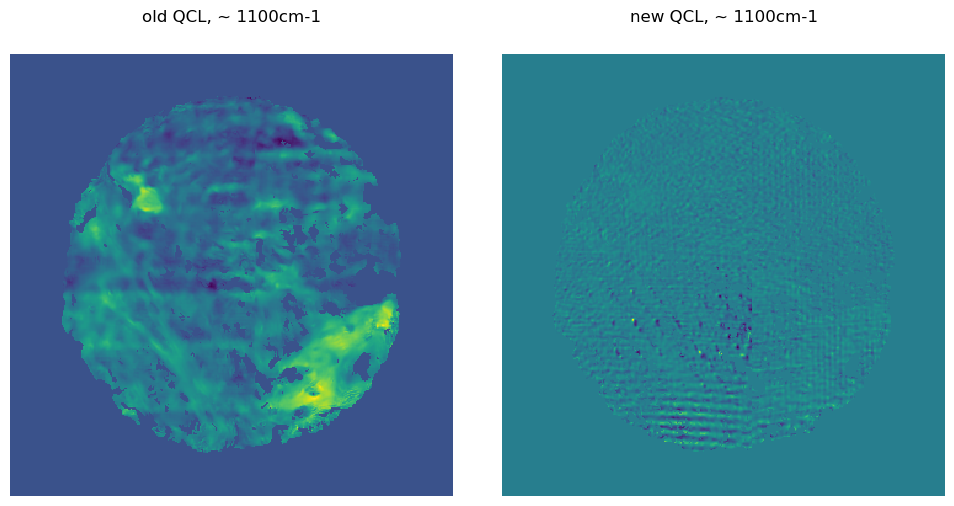

In [122]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
wv = 1100
wv_new = np.argmin(np.abs(wavenumbers_new[10:-10]-wv))
wv_old = np.argmin(np.abs(wavenumbers_old-wv)); print(wv_new,wv_old)
ax[0].matshow(qcl_old[wv_old]); ax[0].set_axis_off(); ax[0].set_title(f"old QCL, ~ {wv}cm-1")
ax[1].matshow(np.rot90(qcl_new[wv_new],k=2)[::-1]); ax[1].set_axis_off(); ax[1].set_title(f"new QCL, ~ {wv}cm-1")
fig.tight_layout()

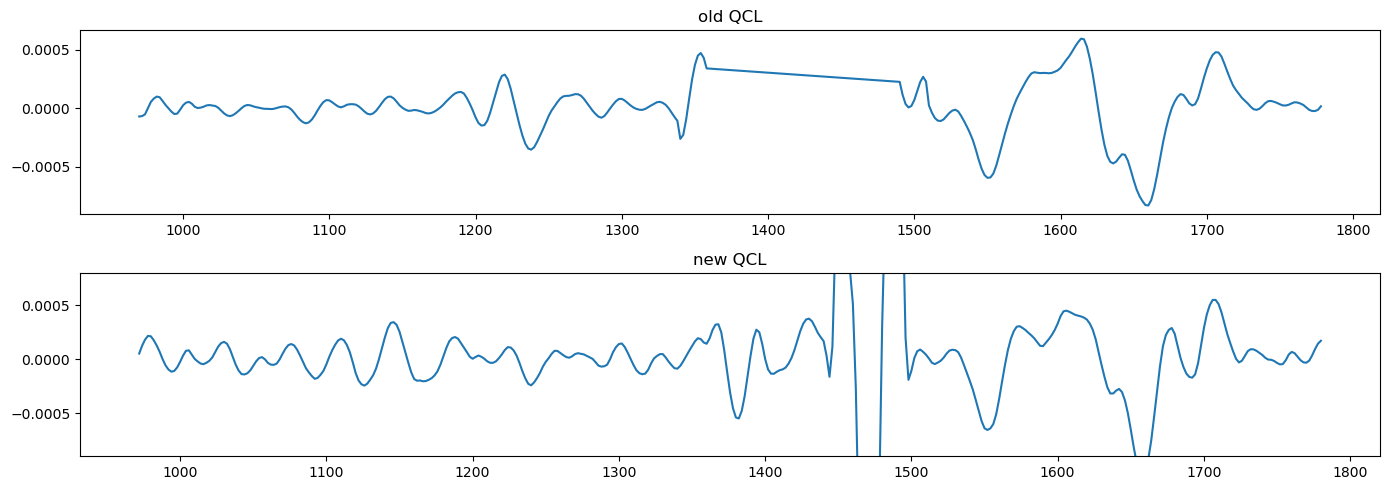

In [60]:
fig,ax = plt.subplots(2,1,figsize=(14,5))
(x,y) = 250,250
ax[0].plot(wavenumbers_old,qcl_old[:,y,x]); ax[0].set_title("old QCL")
ax[1].plot(wavenumbers_new[10:-10],np.rot90(qcl_new.permute(1,2,0).numpy()[::-1],k=-1)[y,x]); ax[1].set_title("new QCL")
ax[1].set_ylim(ymin=-0.0009,ymax=0.0008)
fig.tight_layout()

In [12]:
print(qcl_old.shape,qcl_new.shape)

torch.Size([340, 360, 360]) torch.Size([405, 360, 360])
